In [1]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os

from matplotlib import pyplot
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax

from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img

from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation,Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.simplefilter("ignore")

from keras.models import Model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.regularizers import l1, l2
import plotly.express as px


In [2]:
data = pd.read_csv("E:/fer2013.csv")

In [3]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
CLASS_LABELS = ['Anger', 'Digust', 'Fear', 'Happy','Neutral','Sadness','Surprise']
fig = px.bar(x = CLASS_LABELS, y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , color = np.unique(data['emotion']), color_continuous_scale="Emrld")
fig.update_xaxes(title = "Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True, 
                  title={
                    'text':'Train Data Distribution',
                    'y':0.95,
                    'x':0.5, 'xanchor':'center', 'yanchor':'top'
                    
                  })
fig.show()

In [6]:
data = data.sample(frac=1)

In [7]:
labels = to_categorical(data['emotion'], num_classes=7)

In [8]:
train_pixels = data['pixels'].astype(str).str.split(" ").tolist()

In [9]:
train_pixels = np.uint8(train_pixels)

In [10]:
pixels = train_pixels.reshape((35887*2304, 1))

In [11]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

In [12]:
pixels = pixels.reshape((35887, 48, 48, 1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size = 0.1, shuffle =False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, shuffle =False)


In [14]:
y_train[:8]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

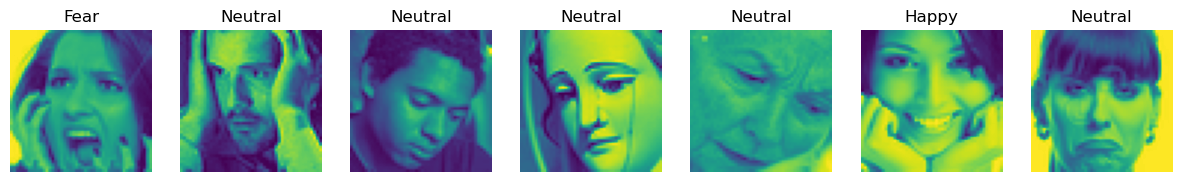

In [15]:
plt.figure(figsize=(15,23))
label_dict = {
  0:'Anger',
  1:'Digust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sadness',6:'Surprise'
}
for i in range(1, len(label_dict)+1):
  img = np.squeeze(X_train[i])
  plt.subplot(1, 7, i,)
  plt.imshow(img)
  index = np.argmax(y_train[i])
  plt.title(label_dict[index])
  plt.axis('off')
  i+=1
plt.show()

### 使用图像数据生成器进行数据增强

In [16]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=0.2)
valgen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=0.2)

In [17]:
datagen.fit(X_train)
datagen.fit(X_val)

train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator =  datagen.flow(X_val, y_val,batch_size=64)